# Aproximación
#### 02/04/2020 - ELopez

## Polinomios
- Polinomio de grado n: `n + 1 términos`

$$p_n(x) = c_1 x^n + c_2x^{n-1} + \dots c_n x + c_{n+1}$$

#### Ejemplo 1
$$p_3(x) = x^3 - \frac{5}{2}x^2 + \frac{1}{2}x + 1$$

In [1]:
x = -2:0.1:3; # dominio
p3 = x.^3 - (5/2)*x.^2 + (1/2)*x + 1;  

In [2]:
coef = [1, -5/2, 1/2, 1]; # vector con coeficientes
p3 = coef(1)*x.^(3) + coef(2)*x.^(2) + coef(3)*x.^(1) + coef(4)*x.^(0);

In [3]:
plot(x,p3)

**ATENCION: esto es INESTABLE, NO SE RECOMIENDA**

**Algoritmo de Horner**

In [2]:
function pnz = polinom(c,x) 
    # pnz - evalua polinomio con multiplicacion anidada
    n = length(c);
    pnz = zeros(1,length(x));
    for k=1:n
        pnz = c(k) + pnz.*x;
    end
end

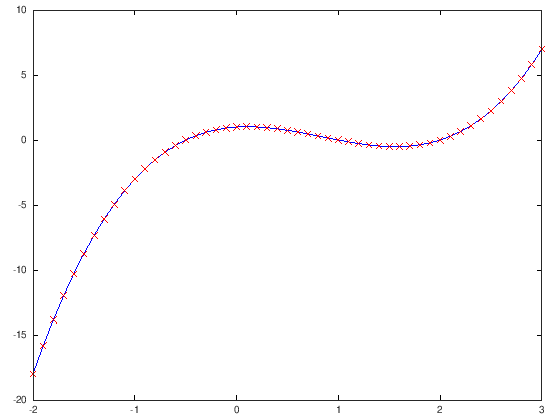

In [5]:
y1 = polinom(coef,x);
y2 = polyval(coef,x);
plot(x, y1, "-b", x, y2, "xr"); 

### Ejemplo 3: Aproximación de funciones con polinomios de Taylor 


El polinomio de taylor de quinto orden

$$p_5(x) = \frac{(x-1)^5}{5}-\frac{(x-1)^4}{4}+\frac{(x-1)^3}{3}-\frac{(x-1)^2}{2}+ (x-1)$$

aproxima la función $ln(x)$ en torno al punto $a=1$.

**NOTAR la ausencia del coeficiente independiente: $c_{n+1}=0$**

In [6]:
x = 0.1:0.1:2.6;
c = [1/5, -1/4, 1/3, -1/2, 1, 0];  # notar el cero!
y1 = polinom(c, x-1);
y2 = polyval(c, x-1);
y3 = log(x);

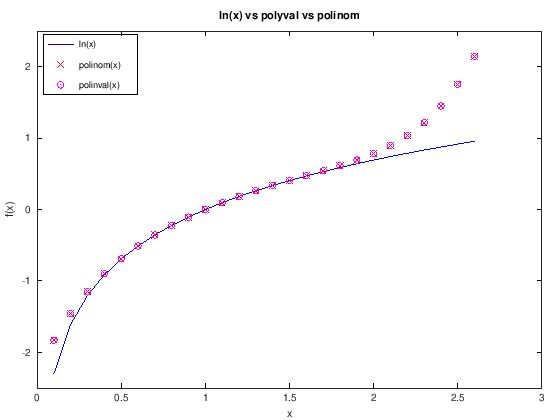

In [7]:
plot(x, y3,"-b", x, y1, "xr", x, y2, "om" );
legend ("ln(x)", "polinom(x)","polinval(x)", "location", "northwest");
title("ln(x) vs polyval vs polinom");
axis([0. 3. -2.5 2.5]);
xlabel("x"); ylabel("f(x)");

# Gracias por su atención

- Hacer los ejemplos por su cuenta

- **Recomendación:** consultas por el foro!!

### Ejemplo 6
Aproximemos $e^x$ cuya expansión en la vecindad de $a=0$ es

$$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + ...$$

para con $p_0$, $p_1$ y $p_2$.

In [ ]:
x = -1:0.1:1;

# coeficientes para cada polinomio
c1 = [        1];
c2 = [     1, 1];
c3 = [1/2, 1, 1];

# polimoios de aproximacion de distintos grados
p0 = polinom(c1,x);
p1 = polinom(c2,x);
p2 = polinom(c3,x);

In [ ]:
# linestyle
# ’-’ : solid lines (default).
# ’--’ : dashed lines
# ’:’ : dotted lines.
# ’-.’ : dash-dotted lines.
hold on;
plot(x, p0, "-.r", "markersize", 10, "linewidth", 5);
plot(x, p1, ":b" , "markersize", 10, "linewidth", 5);
plot(x, p2, "-.m", "markersize", 10, "linewidth", 5);
plot(x, exp(x), "k", "linewidth", 3);
legend("p0", "p1", "p2", "exp(x)", "location", "northwest")
axis([-1.2 1.2 -0.2 2.5]);
title("Aproximacion de exp(x) con Polinomios de Taylor")
ylabel("polinom")
xlabel("x")

### Ejemplo 7
En la teoría se vio que el grado del polonomio de Taylor para obtener un error $\epsilon < 10^{-5}$ es $n=8$. Corroboremos esto:

In [ ]:
c = [1/40320, 1/5040, 1/720, 1/120, 1/24, 1/6, 1/2, 1, 1];
p8 = polinom(c,1);
err = abs(p8 - exp(1))

### Ejemplo 8

Vamos a aproximar $y=sin(x)$ con polinomios de Taylos de grado 1, 3 y 5.

In [ ]:
# coeficientes de los polinomios
c1 = [1, 0];
c3 = [-1/6, 0, c1];
c5 = [1/120, 0, c3];

# dominio de x
x = -pi:0.1:pi;
p1 = polinom(c1, x);
p3 = polinom(c3, x);
p5 = polinom(c5, x);

In [ ]:
# graficamos
plot(x, p1,"+b", x, p3,"xr", x, p5,"-.g", x, sin(x), "-k");
legend("p1(x)", "p3(x)", "p5(x)", "sin(x)", "location","north")
axis([-pi pi -1.4 1.4]);
title("Aproximacion de sin(x) con Polinomios de Taylor")
xlabel("x")
ylabel("polinom")

### Ejemplo 9

### Ejemplo 10

## Ejercicios

Resuelva los siguientes casos, y efectue, si es posible, la expansión de Taylor correspondiente de alguna
de las funciones dadas de manera de simplificar las expresiones:

**1)** $$f(x) = \frac{e^x - 1}{x}$$

Sabemos que 

$$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + ...$$

Restando 1 nos queda:

$$e^x -1 = x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} +...$$

Y diviendo por x:

$$\frac{e^x -1}{x} = 1 + \frac{x}{2!} + \frac{x^2}{3!} + \frac{x^3}{4!} +...$$

Ahora graficamos la aproximación usando la nuestra querida función `polinom`:

In [3]:
# coeficientes
c = [1/24, 1/6, 1/2, 1];

# dominio
x = 0.1:0.1:2;

# polinomio de aproximacion
p3 = polinom(c,x);

# funcion octave
f = (exp(x)-1)./x;

plot(x, p3, x, f)
legend("Aprox polinom 3", "f(x)")

**2)** $$f(x) = \frac{sin(x)}{x}$$

Sabemos que:

$$sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} + ...$$

por lo tanto al dividirlo por *x* nos queda

$$\frac{sin(x)}{x} = 1 - \frac{x^2}{3!} + \frac{x^4}{5!} - \frac{x^6}{7!}+...$$

In [ ]:
# coeficientes de los polinomios
c6 = [-1/5040, 0, 1/120, 0, -1/6, 0, 1];
c5 = c6(2:length(c6));
x = -4:0.1:4;

p6 = polinom(c6, x);
p5 = polinom(c5, x);

plot(x, sin(x)./x,"r", x, p6,"xb", x, p5, "+g")
legend("sin(x)/x", "p6", "p5")

**3)** $$I(a) = \int_0^a \frac{sin(x)}{x} dx$$

Primero integramos la expansión que calculamos en el ejercicio previo:


$$\int_0^a \frac{sin(x)}{x} dx = \int_0^a 1 - \frac{x^2}{3!} + \frac{x^4}{5!} - \frac{x^6}{7!} + ... dx$$

$$ = x - \frac{x^3}{3*3!} + \frac{x^5}{5*5!} - \frac{x^7}{7*7!} + ... \bigg]_0^a$$

Reacomodamos, 

$$ p_7(a)= - \frac{a^7}{35280} + 0a^6 + \frac{a^5}{600} + 0a^4 - \frac{a^3}{18} + 0a^2 + a + 0$$

In [ ]:
a = 0.7;
c7 = [-1/35280, 0, 1/600, 0, 1/18, 0, 1, 0];
p7 = polinom(c7, a)
err= abs(p7 - sqrt(pi)*erf(a)/2)

**4)**